In [1]:
%matplotlib inline

In [2]:
from iuvs import io, meta, plotting

In [34]:
metadf = meta.l1a_summary()

/usr/local/python3/miniconda/lib/python3.4/site-packages/pandas-0.15.2_188_gc37f8df-py3.4-linux-x86_64.egg/pandas/io/parsers.py:1164: DtypeWarning:

Columns (0,2,14,20) have mixed types. Specify dtype option on import or set low_memory=False.



In [35]:
muvdark = metadf[(metadf.filename.str.contains('muvdark'))]

In [36]:
muvdark = muvdark[muvdark.convert_objects(convert_numeric=True).MCP_HV == 0]

In [38]:
muvdark.MCP_HV.value_counts()

0    3668
0     529
dtype: int64

In [42]:
cols = 'INT_TIME NX NY NZ BINX BINY'.split()

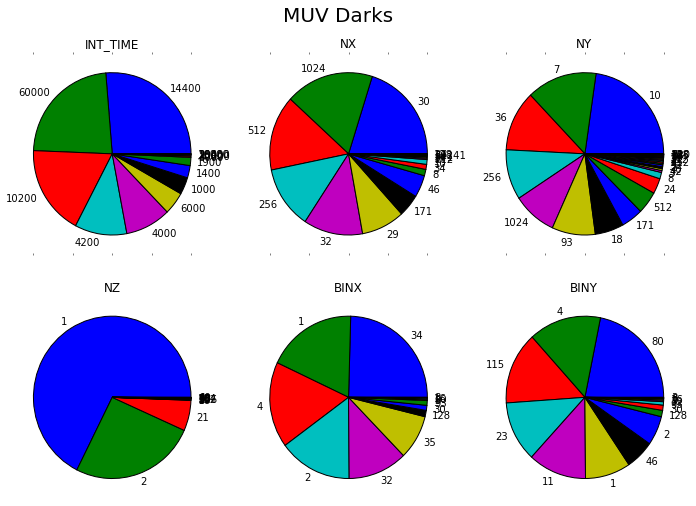

In [43]:
plotting.plot_pie_overview(muvdark, cols, 'MUV Darks');

In [10]:
metadf[metadf.filename.str.contains('muvdark')].MCP_HV.value_counts()

0      3668
0       529
846     198
497       2
dtype: int64

In [41]:
muv60000 = muvdark[muvdark.INT_TIME == 60000]
muv14400 = muvdark[muvdark.INT_TIME == 14400]
muv10200 = muvdark[muvdark.INT_TIME == 10200]

In [47]:
for item in [muv60000, muv14400, muv10200]:
    print(len(item))

968
1104
753


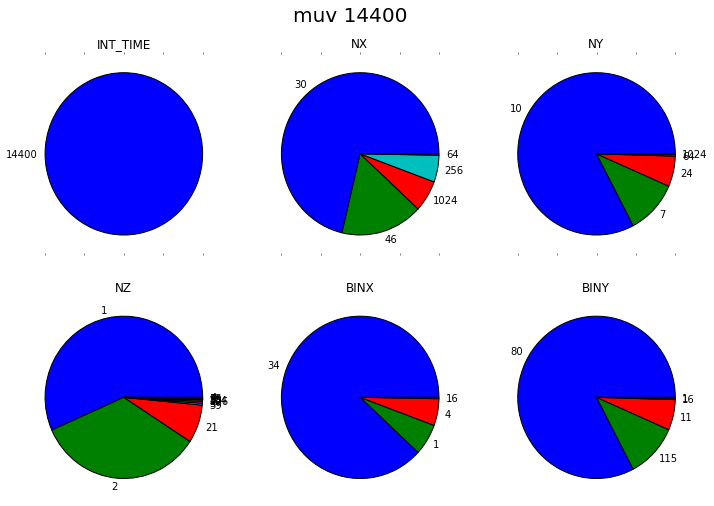

In [48]:
plotting.plot_pie_overview(muv14400, cols, 'muv 14400');

In [55]:
ffmuvdark = meta.get_full_frames(muvdark)

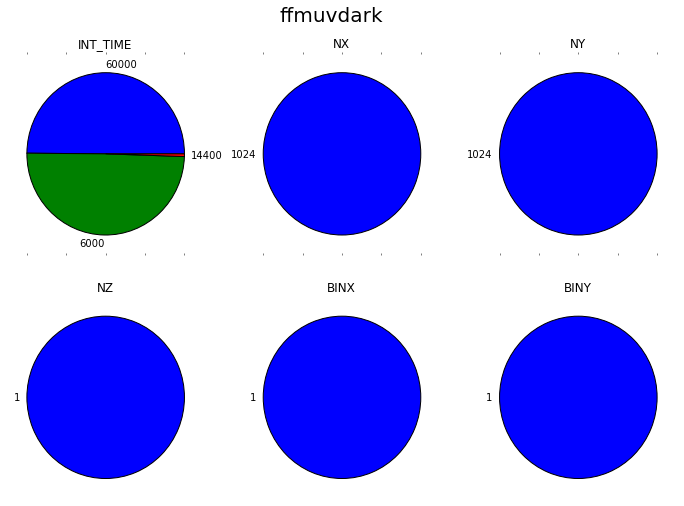

In [57]:
plotting.plot_pie_overview(ffmuvdark, cols, 'ffmuvdark');

In [58]:
ffmuvdark60000 = ffmuvdark[ffmuvdark.INT_TIME==60000]

In [59]:
ffmuvdark6000 = ffmuvdark[ffmuvdark.INT_TIME==6000]

In [61]:
ffmuvdark6000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 1474 to 14980
Data columns (total 25 columns):
filename      187 non-null object
OBS_ID        187 non-null object
XUV           187 non-null object
INT_TIME      187 non-null int64
NX            187 non-null int64
NY            187 non-null int64
NZ            187 non-null int64
X1            187 non-null int64
X2            187 non-null int64
Y1            187 non-null int64
Y2            187 non-null int64
BINX          187 non-null int64
BINY          187 non-null int64
MCP_HV        187 non-null object
SHUT_STATE    187 non-null object
PHASE         187 non-null int64
MODE          187 non-null float64
CYCLE         187 non-null float64
DET_TEMP      187 non-null float64
CASE_TEMP     187 non-null object
FOV_DEG       187 non-null object
STIM_STATE    187 non-null object
FILL_BINS     187 non-null object
TARGET        0 non-null float64
PURPOSE       0 non-null float64
dtypes: float64(5), int64(11), object(9)
memory usage: 

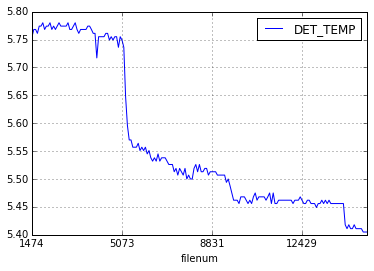

In [62]:
ffmuvdark6000['DET_TEMP CASE_TEMP'.split()].plot()

In [66]:
ffmuvdark6000.columns

Index(['filename', 'OBS_ID', 'XUV', 'INT_TIME', 'NX', 'NY', 'NZ', 'X1', 'X2', 'Y1', 'Y2', 'BINX', 'BINY', 'MCP_HV', 'SHUT_STATE', 'PHASE', 'MODE', 'CYCLE', 'DET_TEMP', 'CASE_TEMP', 'FOV_DEG', 'STIM_STATE', 'FILL_BINS', 'TARGET', 'PURPOSE'], dtype='object')

In [94]:
cols = ['MODE', 'CYCLE', 'DET_TEMP']

In [95]:
ffmuvdark6000[cols].head(20)

,MODE,CYCLE,DET_TEMP
filenum,,,
1474,1,-0.7366,5.755
1546,2,-0.2872,5.768
1618,3,-0.4370,5.768
1690,4,-0.4370,5.761
1762,5,-0.5868,5.774
1834,6,-0.7366,5.774
1905,7,-0.5868,5.780
1977,8,-0.7366,5.768
2049,9,-0.7366,5.774


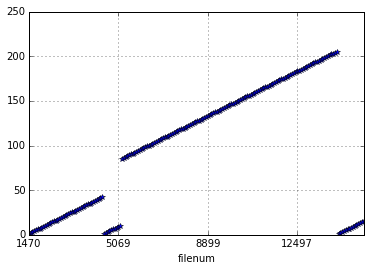

In [97]:
ffmuvdark60000.MODE.plot(style='*')

In [98]:
ffmuvdark6000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 1474 to 14980
Data columns (total 25 columns):
filename      187 non-null object
OBS_ID        187 non-null object
XUV           187 non-null object
INT_TIME      187 non-null int64
NX            187 non-null int64
NY            187 non-null int64
NZ            187 non-null int64
X1            187 non-null int64
X2            187 non-null int64
Y1            187 non-null int64
Y2            187 non-null int64
BINX          187 non-null int64
BINY          187 non-null int64
MCP_HV        187 non-null object
SHUT_STATE    187 non-null object
PHASE         187 non-null int64
MODE          187 non-null float64
CYCLE         187 non-null float64
DET_TEMP      187 non-null float64
CASE_TEMP     187 non-null object
FOV_DEG       187 non-null object
STIM_STATE    187 non-null object
FILL_BINS     187 non-null object
TARGET        0 non-null float64
PURPOSE       0 non-null float64
dtypes: float64(5), int64(11), object(9)
memory usage: 

In [101]:
from iuvs import io
import numpy as np

In [141]:
means60000 = []
for fname in ffmuvdark60000.filename:
    print(fname)
    l1a = io.L1AReader(fname)
    p2, p98 = np.percentile(l1a.img[~np.isnan(l1a.img)], (2,98))
    data = l1a.img[l1a.img < p98]
    data = data[data> p2]
    means60000.append(np.nanmean(data))

mvn_iuv_l1a_IPH1-cycle00001-mode040-muvdark_20140403T020910_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00002-mode040-muvdark_20140403T100912_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00003-mode040-muvdark_20140403T180914_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00004-mode040-muvdark_20140404T020916_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00005-mode040-muvdark_20140404T100918_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00006-mode040-muvdark_20140404T180920_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00007-mode040-muvdark_20140405T020922_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00008-mode040-muvdark_20140405T100924_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00009-mode040-muvdark_20140405T180926_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00010-mode040-muvdark_20140406T020929_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00011-mode040-muvdark_20140406T100930_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00012-mode040-muvdark_20140406T180933_v01_r01.fits.gz
mvn_iuv_l1a_IPH1-cycle00013-mode040-muvdark_20140407T020934_v01_r01.fits.gz
mvn_iuv_l1a_

In [142]:
ffmuvdark60000['means'] = means60000

/home/klay6683/src/ipython/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [143]:
ffmuvdark60000['time'] = ffmuvdark60000.filename.map(lambda x: io.Filename(x).time)

/home/klay6683/src/ipython/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [118]:
ffmuvdark6000.columns

Index(['filename', 'OBS_ID', 'XUV', 'INT_TIME', 'NX', 'NY', 'NZ', 'X1', 'X2', 'Y1', 'Y2', 'BINX', 'BINY', 'MCP_HV', 'SHUT_STATE', 'PHASE', 'MODE', 'CYCLE', 'DET_TEMP', 'CASE_TEMP', 'FOV_DEG', 'STIM_STATE', 'FILL_BINS', 'TARGET', 'PURPOSE', 'medians', 'means'], dtype='object')

In [144]:
ffmuvdark60000.set_index('time', inplace=True)

In [125]:
def calc_4_3(width):
    return (width, int(3/4*width))

In [134]:
import matplotlib.pyplot as plt

In [137]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = calc_4_3(12)

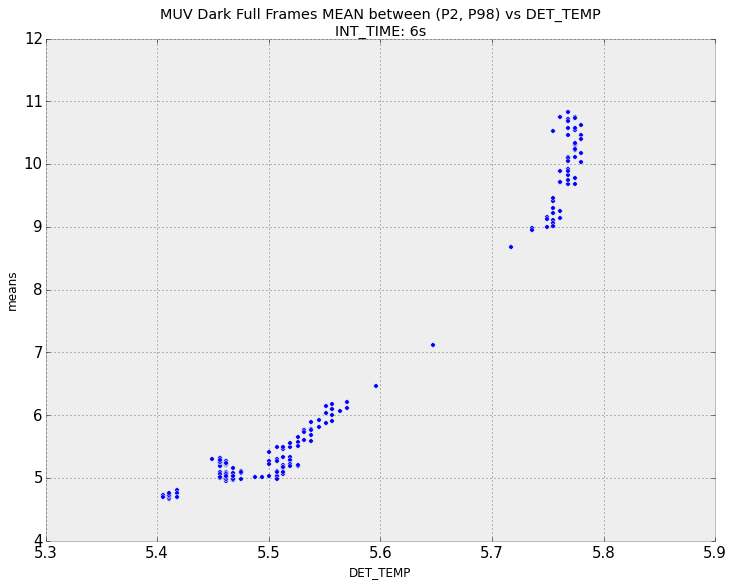

In [153]:
ffmuvdark6000.plot(y='means', x='DET_TEMP', kind='scatter',
                   title="MUV Dark Full Frames MEAN between (P2, P98) vs DET_TEMP\nINT_TIME: 6s", fontsize=15)
plt.savefig('/home/klay6683/MUV_dark_ff_inttime_6s_means_vs_dettemp.png', dpi=150)

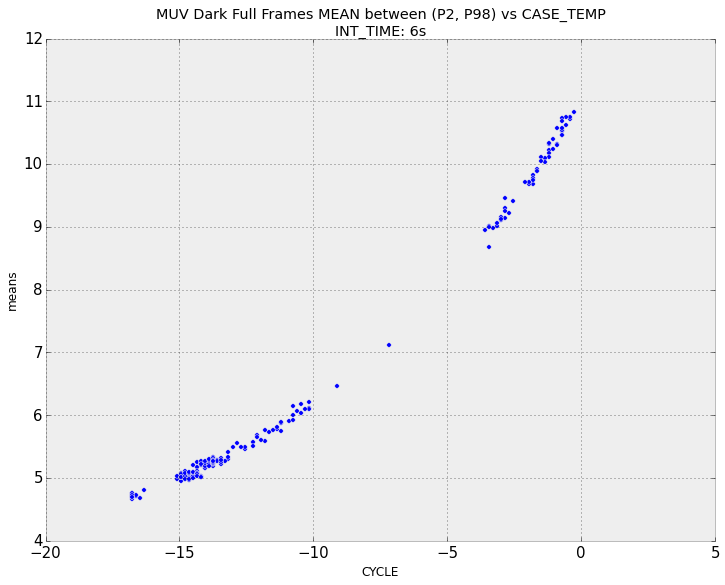

In [154]:
ffmuvdark6000.plot(y='means', x='CYCLE', kind='scatter',
                  title="MUV Dark Full Frames MEAN between (P2, P98) vs CASE_TEMP\nINT_TIME: 6s", fontsize=15)
plt.savefig('/home/klay6683/MUV_dark_ff_inttime_6s_means_vs_case_temp.png', dpi=150)